<a href="https://colab.research.google.com/github/vanshraj126/CreditCard_FraudDetection/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [3]:

data = pd.read_csv("creditcard_2023.csv")


In [4]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:

print(data.shape)
print(data.describe())


(568630, 31)
                  id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486121  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001

Time to explain the data we are dealing with.

In [6]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


1.0
Fraud Cases: 284315
Valid Transactions: 284315


In [7]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


,Amount
count,284315.000000
mean,12057.601763
std,6909.750891
min,50.010000
25%,6074.640000
50%,12062.450000
75%,18033.780000
max,24039.930000


In [8]:
print("details of valid transaction")
valid.Amount.describe()


details of valid transaction


,Amount
count,284315.000000
mean,12026.313506
std,6929.500715
min,50.120000
25%,6034.540000
50%,11996.900000
75%,18040.265000
max,24039.930000


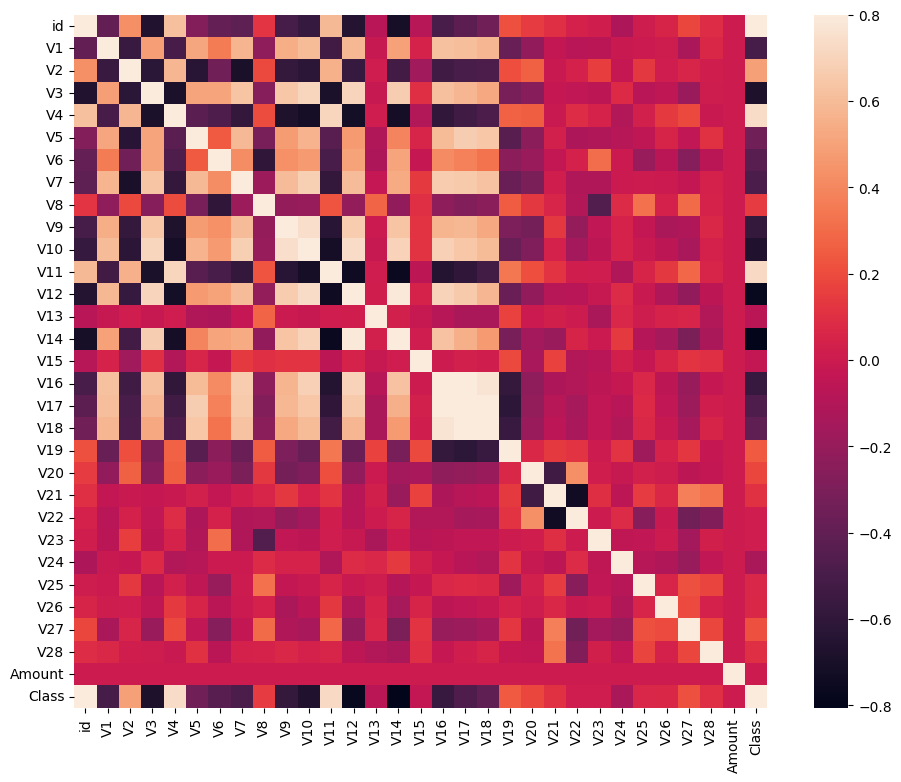

In [9]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [10]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
xData = X.values
yData = Y.values


(568630, 30)
(568630,)


In [11]:
# Check for NaN values in Y
print("Number of NaN values in Y:", np.isnan(yData).sum())

Number of NaN values in Y: 0


In [12]:
# Drop rows where Y has NaN values
data_cleaned = data.dropna(subset=['Class'])

# Recreate X and Y
X = data_cleaned.drop(['Class'], axis=1)
Y = data_cleaned["Class"]

# Convert to NumPy arrays
xData = X.values
yData = Y.values

**Training the Model**

In [13]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(xTrain, yTrain)
yPred = rfc.predict(xTest)

In [16]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9998329317834093
The precision is 0.9999473342345031
The recall is 0.9997191800056164
The F1-Score is 0.9998332441043014
The Matthews correlation coefficient is0.9996658885240107


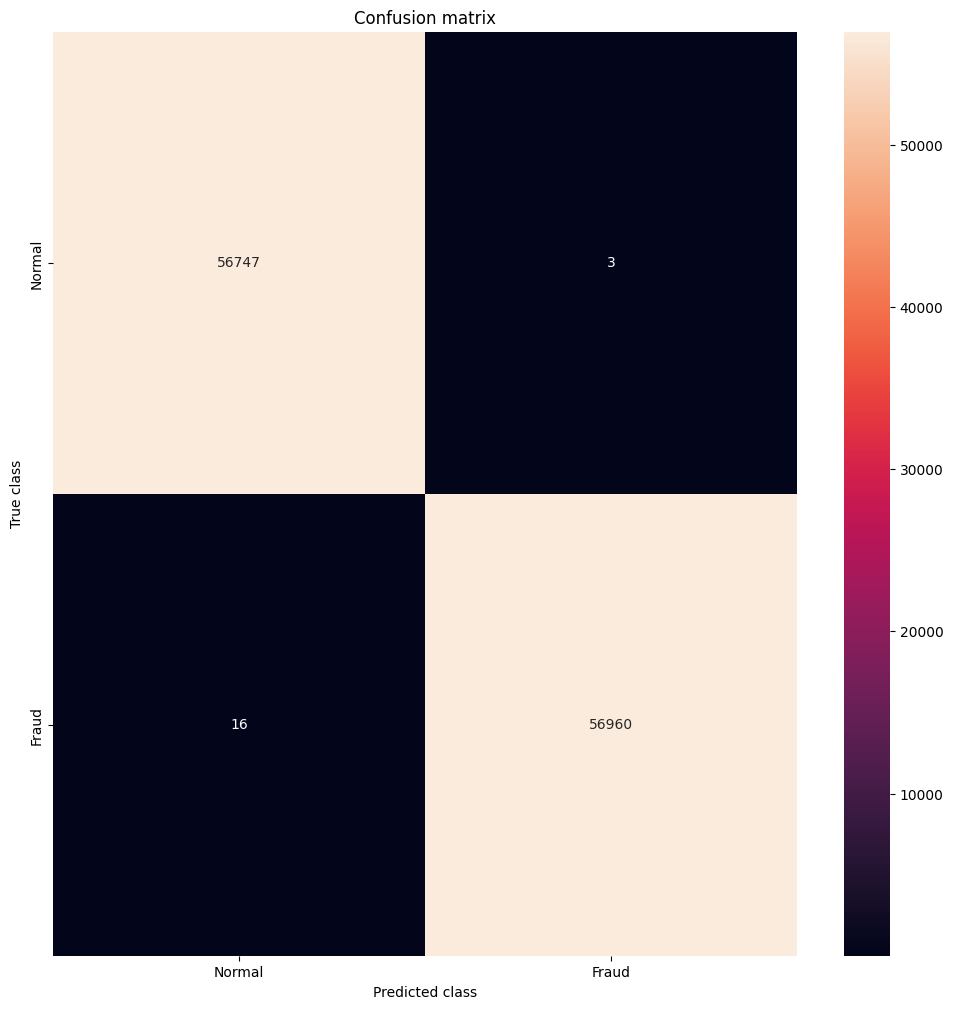

In [17]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [18]:
xTrain_sample, _, yTrain_sample, _ = train_test_split(xTrain, yTrain, train_size=0.3, random_state=42)

# Now fit using only 30% of the data
rfc.fit(xTrain_sample, yTrain_sample)


RandomForestClassifier(n_estimators=10)

In [19]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rfc.fit(xTrain, yTrain)


RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

Accuracy: 0.9997977595272849
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



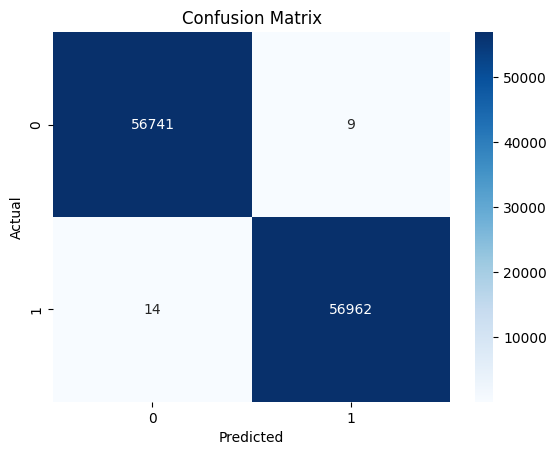

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict on test data
yPred = rfc.predict(xTest)

# Print evaluation metrics
print("Accuracy:", accuracy_score(yTest, yPred))
print("Classification Report:\n", classification_report(yTest, yPred))

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(yTest, yPred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [21]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_scores = rfc.predict_proba(xTest)[:, 1]

# Adjust decision threshold
threshold = 0.3  # Default is 0.5, lowering catches more fraud
y_pred_adjusted = (y_scores > threshold).astype(int)

# Evaluate again
print("Adjusted Recall:", recall_score(yTest, y_pred_adjusted))
print("Adjusted Precision:", precision_score(yTest, y_pred_adjusted))
print("Adjusted F1-score:", f1_score(yTest, y_pred_adjusted))


Adjusted Recall: 0.9997718337545634
Adjusted Precision: 0.9996665613702572
Adjusted F1-score: 0.9997191947910634


In [22]:
import numpy as np

precisions, recalls, thresholds = precision_recall_curve(yTest, y_scores)

# Find the threshold that gives the best F1-score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]

print("Best Threshold:", best_threshold)


Best Threshold: 0.6623237583717544


In [23]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_scores = rfc.predict_proba(xTest)[:, 1]

# Adjust decision threshold
threshold = 0.4375699386570502  # Default is 0.5, lowering catches more fraud
y_pred_adjusted = (y_scores > threshold).astype(int)

# Evaluate again
print("Adjusted Recall:", recall_score(yTest, y_pred_adjusted))
print("Adjusted Precision:", precision_score(yTest, y_pred_adjusted))
print("Adjusted F1-score:", f1_score(yTest, y_pred_adjusted))

Adjusted Recall: 0.9997718337545634
Adjusted Precision: 0.9998244782616327
Adjusted F1-score: 0.9997981553150971


***Testing the Model***

In [24]:
import joblib

joblib.dump(rfc, "fraud_model.pkl")
print("Model saved successfully!")



Model saved successfully!


In [26]:
import pandas as pd
import joblib

# Load unseen data
unseen_data = pd.read_csv("/content/synthetic_test_data.csv")  # Replace with your file name
print(unseen_data.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -0.119713 -0.303955 -0.455368  0.288744 -0.745798 -0.664663 -1.477298   
1  0.556436  0.719408 -0.441895  2.019091 -0.110066  0.642052  2.377115   
2 -0.334392  1.092674 -0.863600  0.950748  0.480258 -2.003197 -0.401559   
3  2.101237 -0.418293 -0.399571 -0.976451  0.872521 -1.976684  0.220331   
4  0.084891 -1.753199 -1.027691  1.492642  0.303911 -0.575897  1.141986   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  1.969806  0.999247  0.468314  ... -0.600592  0.963251  0.007998  1.023042   
1  0.546642  0.663852 -0.256114  ...  0.351153 -2.066189 -0.947144  0.746602   
2 -1.897429 -1.133300  0.139328  ... -1.575685 -0.526248  0.545209 -0.150521   
3  0.939053 -0.119046 -0.977155  ... -3.040621 -0.668492 -0.663196  0.236520   
4 -0.797338 -0.881726 -1.546125  ...  0.348979 -0.971965 -0.290853 -3.045905   

        V25       V26       V27       V28       Amount  Class  
0  1

In [27]:
print(unseen_data.columns)  # Compare with your original dataset


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [28]:
print(data.columns)

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [29]:

# Convert to NumPy array
unseen_data_values = unseen_data.values


In [30]:
# Load the trained model
rfc = joblib.load("fraud_model.pkl")

# Get predicted probabilities
y_scores_unseen = rfc.predict_proba(unseen_data_values)[:, 1]

# Apply the best threshold
best_threshold = 0.4375699386570502
y_pred_unseen = (y_scores_unseen > best_threshold).astype(int)

# Display predictions
print("Fraud Predictions for Unseen Data:", y_pred_unseen)


Fraud Predictions for Unseen Data: [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 

In [31]:
print("Total Fraud Cases Detected:", sum(y_pred_unseen))


Total Fraud Cases Detected: 157


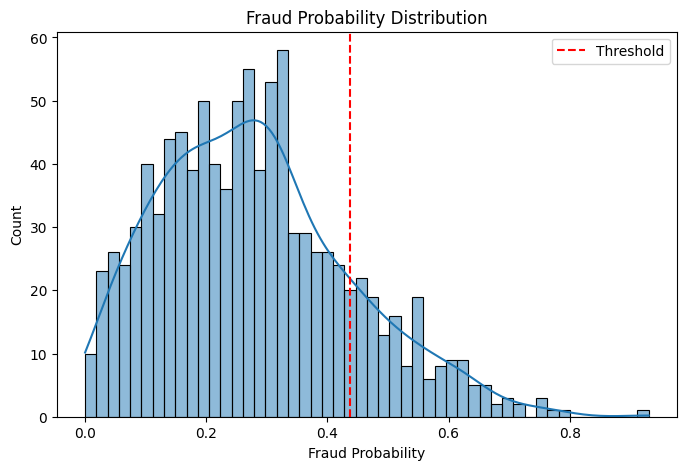

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_scores_unseen, bins=50, kde=True)
plt.axvline(best_threshold, color='red', linestyle='dashed', label="Threshold")
plt.title("Fraud Probability Distribution")
plt.xlabel("Fraud Probability")
plt.ylabel("Count")
plt.legend()
plt.show()


In [33]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9997977595272849
The precision is 0.9998420248898563
The recall is 0.9997542825049144
The F1-Score is 0.9997981517723152
The Matthews correlation coefficient is0.9995955213922739


***Trying Feature Engineering***

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "creditcard_2023.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Drop the 'id' column as it's not useful for prediction
df = df.drop(columns=['id'], errors='ignore')

# Standardize the 'Amount' column
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

# Log transformation to reduce skewness in 'Amount'
df['Log_Amount'] = np.log1p(df['Amount'])

# Drop the original 'Amount' column
df = df.drop(columns=['Amount'])

# Save the updated dataset
df.to_csv("creditcard_2023_processed.csv", index=False)

# Display updated dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   V1             568630 non-null  float64
 1   V2             568630 non-null  float64
 2   V3             568630 non-null  float64
 3   V4             568630 non-null  float64
 4   V5             568630 non-null  float64
 5   V6             568630 non-null  float64
 6   V7             568630 non-null  float64
 7   V8             568630 non-null  float64
 8   V9             568630 non-null  float64
 9   V10            568630 non-null  float64
 10  V11            568630 non-null  float64
 11  V12            568630 non-null  float64
 12  V13            568630 non-null  float64
 13  V14            568630 non-null  float64
 14  V15            568630 non-null  float64
 15  V16            568630 non-null  float64
 16  V17            568630 non-null  float64
 17  V18            568630 non-nul

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the processed dataset
df = pd.read_csv("creditcard_2023_processed.csv")

# Separate features and target
X = df.drop(columns=['Class'])  # Assuming 'Class' is the target variable
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data prepared for training!")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Data prepared for training!
Training samples: 454904, Testing samples: 113726


In [36]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Balanced Random Forest
brf = BalancedRandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
brf.fit(X_train, y_train)

# Predictions
y_pred = brf.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[56846    17]
 [    3 56860]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [37]:
import pandas as pd

# Check correlation of features with target
corr_matrix = pd.concat([X_train, y_train], axis=1).corr()
print(corr_matrix['Class'].sort_values(ascending=False))


Class            1.000000
V4               0.736032
V11              0.724128
V2               0.491705
V19              0.242882
V27              0.212877
V20              0.180013
V8               0.144438
V21              0.109341
V28              0.103042
V26              0.070524
V25              0.062639
V22              0.014222
V23              0.010631
Log_Amount       0.004142
Amount_Scaled    0.003083
V15             -0.038295
V13             -0.070600
V24             -0.129030
V5              -0.338427
V18             -0.409738
V6              -0.434829
V17             -0.475287
V7              -0.486331
V1              -0.505727
V16             -0.572419
V9              -0.586007
V10             -0.674066
V3              -0.681874
V12             -0.768926
V14             -0.805379
Name: Class, dtype: float64


In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Confusion Matrix:
 [[55593  1270]
 [ 2714 54149]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726



**✅ What This Tells Us**:

The previous Balanced Random Forest model was likely overfitting!
***It had 100% accuracy, which is unrealistic.***

Possible data leakage from features like V4, V11, V12, V14.

**Logistic Regression gives a more realistic benchmark.**

***F1-score: ~96%, which is still strong.***
Some fraud cases are missed (FN = 2,714), so recall can be improved.

In [39]:
# Drop highly correlated features
X_train_filtered = X_train.drop(columns=['V4', 'V11', 'V12', 'V14'])
X_test_filtered = X_test.drop(columns=['V4', 'V11', 'V12', 'V14'])


In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_filtered, y_train)

y_pred_xgb = xgb.predict(X_test_filtered)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:26:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[56823    40]
 [    0 56863]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:26:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


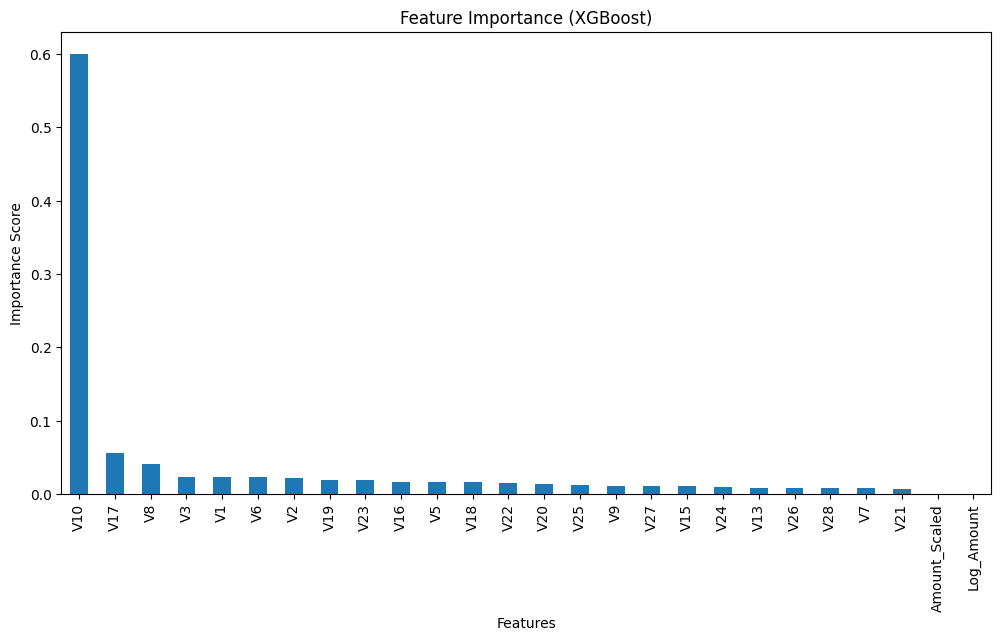

In [41]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Train XGBoost again (if not done already)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_filtered, y_train)

# Get feature importance
feature_importance = pd.Series(xgb.feature_importances_, index=X_train_filtered.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

# Show plot
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [42]:
from xgboost import XGBClassifier

# Compute class weights
fraud_weight = len(y_train) / (2 * sum(y_train))
valid_weight = len(y_train) / (2 * (len(y_train) - sum(y_train)))

xgb_weighted = XGBClassifier(scale_pos_weight=fraud_weight / valid_weight,
                             use_label_encoder=False, eval_metric='logloss')
xgb_weighted.fit(X_train_filtered, y_train)

y_pred_xgb_weighted = xgb_weighted.predict(X_test_filtered)
print("XGBoost with Class Weights:\n", classification_report(y_test, y_pred_xgb_weighted))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:26:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost with Class Weights:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

